In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('cleanedData.csv')
df[0:5]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

<AxesSubplot:>

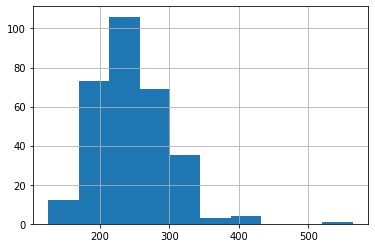

In [4]:
df['chol'].hist()

In [5]:
df['chol'].value_counts()

204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64

In [6]:
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
X = np.asarray(X)
X = X.astype('int')
X[0:5]

array([[ 63,   1,   3, 145, 233,   1,   0, 150,   0,   2,   0,   0,   1],
       [ 37,   1,   2, 130, 250,   0,   1, 187,   0,   3,   0,   0,   2],
       [ 41,   0,   1, 130, 204,   0,   0, 172,   0,   1,   2,   0,   2],
       [ 56,   1,   1, 120, 236,   0,   1, 178,   0,   0,   2,   0,   2],
       [ 57,   0,   0, 120, 354,   0,   1, 163,   1,   0,   2,   0,   2]])

In [7]:
y = df['output']
y = np.asarray(y)
y = y.astype('int')
y[0:5]

array([1, 1, 1, 1, 1])

In [16]:
from sklearn.model_selection import train_test_split
X_trainset , X_testset , y_trainset , y_testset = train_test_split(X,y,test_size=0.2,random_state=4)

In [17]:
print(X_trainset.shape,y_trainset.shape)

(242, 13) (242,)


In [18]:
outputTree = DecisionTreeClassifier(criterion='entropy',max_depth=12)
outputTree

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [19]:
outputTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [20]:
predTree = outputTree.predict(X_testset)

In [21]:
print(predTree[0:20])
print(y_testset[0:20])

[0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1]
[1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0]


In [22]:
from sklearn import metrics
print("DecisionTree's Accuracy : " , metrics.accuracy_score(y_testset, predTree))

DecisionTree's Accuracy :  0.8524590163934426
